# AI in Medicine: Data Science - Basics I

## Python Programming: `numpy` and `pandas`

- **Instructor**: Sebastian Boie , Institute of Medical Informatics, Charité - Universitätsmedizin Berlin (sebastian-daniel.boie@charite.de)
- **Course date**: July 2024

## 1. Aims of this session

In this talktorial, you will get in touch with **data science**. Using the **Python packages `numpy` and `pandas`**, you will load and work with the RKI COVID-19 dataset for Berlin.

## 2. Learning goals

### Theory

* Data science
* The `numpy` library
* The `pandas` library

### Practical

1. Dataset
2. Read data with `pandas` as `DataFrame`
3. Look at data
4. Select columns
5. Get unique entries in a column
6. Select rows
7. Group data

## 3. References

- Data science, machine learning, artificial intelligence
  - http://varianceexplained.org/r/ds-ml-ai/
- Vectors, matrices, tensors
  - https://www.quantstart.com/articles/scalars-vectors-matrices-and-tensors-linear-algebra-for-deep-learning-part-1/
  - https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66
- `numpy`
  - https://numpy.org/doc/stable/user/absolute_beginners.html
  - https://scipy-lectures.org/intro/numpy/array_object.html
- `pandas`
  - https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955
  - https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
  - https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
- Datasets
  - COVID-19 cases:  [raw RKI data](https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv)
  - Vaccination progress in Germany: [raw RKI data](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquoten-Tab.html) and [processed data](https://github.com/ard-data/2020-rki-impf-archive)
- Data visualization
  - [RKI COVID-19 dashboard](https://corona.rki.de/)
  - [COVID-19 cases for Berlin's districts > Bezirke > Übersicht](https://www.berlin.de/corona/lagebericht/)
  - [Vaccination dashboard](https://impfdashboard.de/)

## 4. Theory

### Data Science

#### What is the difference between data science, machine learning, and artificial intelligence?

Adapted from [David Robinson's blog post](http://varianceexplained.org/r/ds-ml-ai/).

The fields data science, machine learning, and artificial intelligence do have a great deal of **overlap**, but they are **not interchangeable**.

#### **Data science** produces **insights**
  - “The average patient has a 70% chance of survival” (descriptive: describe a dataset)
  - “Different patients have different chances of survival” (exploratory: find relationships you did not know about)  
  - “A randomized experiment shows that patients assigned to Alice are more likely to survive than those assigned to Bob” (correlation: find out what happens to one variable when you make another variable change)

#### **Machine learning** (ML) produces **predictions**
  - "Predict whether this patient will go into sepsis”
  - “Predict whether this image has a bird in it"

#### **Artificial intelligence** (AI) produces **actions**
  - Game-playing algorithms (Deep Blue, AlphaGo)
  - Robotics and control theory (motion planning, walking a bipedal robot)
  - Optimization (Google Maps choosing a route)

### The `numpy` library

#### Overview

* Role: Scientific computing (with arrays)
* Website: https://numpy.org/
* Description (taken from [here](https://numpy.org/doc/stable/user/absolute_beginners.html)):
> NumPy (Numerical Python) is an open source Python library that’s used in almost every field of science and engineering. It’s the universal standard for working with numerical data in Python, and it’s at the core of the scientific Python and PyData ecosystems. NumPy users include everyone from beginning coders to experienced researchers doing state-of-the-art scientific and industrial research and development. The NumPy API is used extensively in Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and most other data science and scientific Python packages.
* Documentation: https://numpy.org/devdocs/

#### Applications

- Create vectors (1D), matrices (2D), tensors (>= 3D) in the form of arrays
- Use a large collection of high-level mathematical functions to operate on these arrays
- Used extensively in `pandas`, `scipy`, `matplotlib`, `scikit-learn` and most other data science and scientific Python packages

![](https://res.cloudinary.com/practicaldev/image/fetch/s--oTgfo1EL--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0201a.png)

Figure source: https://dev.to/mmithrakumar/scalars-vectors-matrices-and-tensors-with-tensorflow-2-0-1f66

### The `pandas` library

#### Overview

* Role: Data manipulation and analysis
* Website: https://pandas.pydata.org/
* Description (taken from [here](https://pandas.pydata.org/)):
> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.
* Documentation: https://pandas.pydata.org/pandas-docs/stable/

#### Applications

Taken from: https://medium.com/dunder-data/how-to-learn-pandas-108905ab4955

> `pandas` is capable of many tasks including:
>
> * Reading/writing many different data formats
> * Selecting subsets of data
> * Calculating across rows and down columns
> * Finding and filling missing data
> * Applying operations to independent groups within the data
> * Reshaping data into different forms
> * Visualization through matplotlib and seaborn

#### `DataFrame` and `Series`

The `pandas` library has two main containers of data, the `DataFrame` (2D) and the `Series` (1D).

- `DataFrame` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):
  > Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure
- `Series` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):
  > One-dimensional ndarray with axis labels (including time series).


The `DataFrame` is used more than the `Series`, so let’s take a look at its components.

![DataFrame anatomy](https://raw.githubusercontent.com/volkamerlab/ai_in_medicine/master/images/dataframe_anatomy.png)

Figure source: https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

## 5. Practical

<div class="alert alert-block alert-info">
    <b>Our aim:</b> We will walk through all functionalities in pandas that we will need to visualize the latest COVID-19 case numbers for Berlin by age group and district. After you have seen how this can be done, you will get the latest data for the German vaccination progress and will plot the time course of first/second vaccinations yourself.
</div>

### 5.1. Dataset

We will work with the data on COVID-19 cases which is daily published by the Robert-Koch-Institut (RKI) and is visualized very nicely on the RKI COVID-19 Dashboard (https://corona.rki.de).
In this notebook we will focus on data for Berlin.

The dataset is freely available [here](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0): We can load the dataset directly into `pandas` from this URL: https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv

### 5.2. Read data with `pandas` as `DataFrame`

In [1]:
import numpy as np
import pandas as pd

First, we import the libraries `numpy` and `pandas` (abbreviated as `np` and `pd` so that we can write shorter code from here on). Libraries are a collection of functionalities that enable you to perform many common tasks without writing the whole code yourself from scratch.

For instance, the `pandas` library provides the function `read_csv()` to read a comma-separated values (csv) file into a so-called `DataFrame`.

**Tip**: You can check out available functionalities of a library in this Jupyter notebook, by writing the library name followed by a dot and then hitting the tab key. All available functionalities will pop up for you to explore. Since there are a lot of options, you can narrow it down by writing e.g. `read` while the popup windows is up.

**Note**: If you are working in in Google Colab you will first have to disable `Automatically trigger code completions` on `Tools` > `Settings` > `Editor` in order to be able to use this feature.

See for yourself all the possible file formats that you can read with `pandas`:

If we execute (with `Enter`) this cell, we get an `AttributeError` because the module `pandas` does not know `read()`.

We can also use `?` to get a function's docstring, i.e. a description of what the function does and what kind of parameters we can pass!

We will now use the `read_csv()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)) to load the csv file content as `DataFrame` into the variable `data_raw`.

For **non-Binder user**:

In [2]:
%%time
# `read_csv` takes paths in your computer, but also Internet URLs!
# Reading the remote csv file takes a couple of seconds
data_raw = pd.read_csv("https://raw.githubusercontent.com/ritterlab/ai_in_medicine/master/data/Aktuell_Deutschland_SarsCov2_Infektionen.zip", sep=',', compression='zip')

CPU times: user 8.3 s, sys: 935 ms, total: 9.23 s
Wall time: 11.5 s


For **Binder user** only:

In [ ]:
%%time
# `read_csv` takes paths in your computer, but also Internet URLs!
# Reading the remote csv file takes a couple of seconds
data_raw = pd.read_csv("https://raw.githubusercontent.com/ritterlab/ai_in_medicine/master/data/Aktuell_Deutschland_SarsCov2_Infektionen_binder.zip", sep=',', compression='zip')

Let's take a look at that `DataFrame` in `data_raw`.

### 5.3. Look at data

#### `DataFrame` head/tail

Let's have a look at the first few rows of the table using the `head()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)).

**Note**: We will use this command a lot to avoid printing large tables in this Jupyter notebook.

In [3]:
data_raw.head()  # Shows by default the first 5 entries

,IdLandkreis,Altersgruppe,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,IdBundesland,Datenstand,Land,Bundesland,IdKreis,Landkreis
0,1001,A15-A34,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1,1,2023-01-22 14:40:55.378143,1,Schleswig-Holstein,1001,"Flensburg, Stadt"
1,1001,A15-A34,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1,1,2023-01-22 14:40:55.378143,1,Schleswig-Holstein,1001,"Flensburg, Stadt"
2,1001,A15-A34,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1,1,2023-01-22 14:40:55.378143,1,Schleswig-Holstein,1001,"Flensburg, Stadt"
3,1001,A35-A59,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1,1,2023-01-22 14:40:55.378143,1,Schleswig-Holstein,1001,"Flensburg, Stadt"
4,1001,A15-A34,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1,1,2023-01-22 14:40:55.378143,1,Schleswig-Holstein,1001,"Flensburg, Stadt"


Let's have a look at the last few rows of the table using the `tail()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html)). Note that you can pass a number to the `head()` and `tail()` functions to specify how many first/last rows you want to see.

In [4]:
data_raw.tail(2)

,IdLandkreis,Altersgruppe,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,IdBundesland,Datenstand,Land,Bundesland,IdKreis,Landkreis
6816178,16077,A35-A59,W,2023-01-18,2023-01-18,0,0,-9,-9,3,0,0,16,2023-01-22 14:40:55.378143,16,Thüringen,16077,Altenburger Land
6816179,16077,A60-A79,W,2023-01-18,2023-01-18,0,0,-9,-9,1,0,0,16,2023-01-22 14:40:55.378143,16,Thüringen,16077,Altenburger Land


#### `DataFrame` dimensionality

Let's show the number of columns and rows (= dimensionality/shape) of the table in the form of `(number of rows, number of columns)` using `shape`.

In [5]:
data_raw.shape

(6816180, 18)

#### `DataFrame` column names

We can get all columns names using `columns`.

In [6]:
data_raw.columns

Index(['IdLandkreis', 'Altersgruppe', 'Geschlecht', 'Meldedatum', 'Refdatum',
       'IstErkrankungsbeginn', 'NeuerFall', 'NeuerTodesfall', 'NeuGenesen',
       'AnzahlFall', 'AnzahlTodesfall', 'AnzahlGenesen', 'IdBundesland',
       'Datenstand', 'Land', 'Bundesland', 'IdKreis', 'Landkreis'],
      dtype='object')

Let's list here the meaning of a few criteria (see full list on [RKI COVID-19 data download website](https://www.arcgis.com/home/item.html?id=dd4580c810204019a7b8eb3e0b329dd6)):

- `Bundesland`: State name
- `Landkreis`: District name
- `Altersgruppe`: Age group (6 groups: `0-4`, `5-14`, `15-34`, `35-59`, `60-79`, `80+` and `unbekannt`=unknown)
- `Geschlecht`: Gender (`M`=male, `W`=female and `unbekannt`=unknown)
- `AnzahlFall`: Number of cases in group
- `AnzahlTodesfall`: Number of deaths in group
- `AnzahlGenesen`: Number of recoveries cases in group
- `Meldedatum`: Date when case was reported to the Gesundheitsamt (you will use this in the next lesson on data visualization with `matplotlib`)
- `Datenstand`: Date when data was updated

We can think of a `DataFrame` as a list of lists (whereby each list can contain different data types) which is shown as a table with metadata such as column and index names.

In [7]:
list_of_lists = [['Helen', 20, 'female'], ['Paul', 25, 'male'], ['Kim', 35, 'female']]
list_of_lists

[['Helen', 20, 'female'], ['Paul', 25, 'male'], ['Kim', 35, 'female']]

In [8]:
pd.DataFrame(list_of_lists, columns=['name', 'age', 'gender'])

,name,age,gender
0,Helen,20,female
1,Paul,25,male
2,Kim,35,female


#### _Your turn_: Exercises

__Exercise 1__: Get (a) the first 4 rows and (b) the last 5 rows in `data_raw`

__Exercise 2__: Get (a) the number of columns and (b) the third column name in `data_raw`

__Exercise 3__: Set up a `DataFrame` containing data on 4 countries:
- Country name
- Your favorite thing about this country
- Have you been there already?

### 5.4 Select columns

#### By column name

Let's select some interesting columns! The `DataFrame` is quite large and we are only interested in a subset of the offered criteria. With `pandas`, it is very easy to slice the columns that you want by the following syntax:

```python
data_raw[list_of_interesting_columns]
```

The list of column names of interest could look like this:
```python
list_of_interesting_columns = ['Bundesland', 'Landkreis']
```

Taking both steps together it looks like this (note the two sets of `[]`, the inner `[]` is part of the list, the outer `[]` is the syntax for `DataFrame` slicing):

In [9]:
data_raw[['Bundesland', 'Landkreis']].head()  # Note the use of .head() to show only the first 5 rows

,Bundesland,Landkreis
0,Schleswig-Holstein,"Flensburg, Stadt"
1,Schleswig-Holstein,"Flensburg, Stadt"
2,Schleswig-Holstein,"Flensburg, Stadt"
3,Schleswig-Holstein,"Flensburg, Stadt"
4,Schleswig-Holstein,"Flensburg, Stadt"


We see in the following that it is possible to write a command over multiple lines to make is easier to read.

Let's write this operation's output into the variable `data`; we will use this variable from now on.

In [10]:
data = data_raw[
    [
        'Bundesland',
        'Landkreis',
        'Altersgruppe',
        'Geschlecht',
        'AnzahlFall',
        'AnzahlTodesfall',
        'AnzahlGenesen',
        'Datenstand'
    ]
]

You will have noticed that there is no cell output as before. This happens when the output is saved in a variable (here `data`). Let's inspect the content of `data`:

In [11]:
data.head()

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
0,Schleswig-Holstein,"Flensburg, Stadt",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
1,Schleswig-Holstein,"Flensburg, Stadt",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
2,Schleswig-Holstein,"Flensburg, Stadt",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
3,Schleswig-Holstein,"Flensburg, Stadt",A35-A59,M,1,0,1,2023-01-22 14:40:55.378143
4,Schleswig-Holstein,"Flensburg, Stadt",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143


#### By column AND index names/indices using `loc/iloc`

1. __Recap__

So far we sliced columns using column names like this:

In [12]:
data[['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,"Flensburg, Stadt"
1,Schleswig-Holstein,"Flensburg, Stadt"
2,Schleswig-Holstein,"Flensburg, Stadt"
3,Schleswig-Holstein,"Flensburg, Stadt"
4,Schleswig-Holstein,"Flensburg, Stadt"


2. __`loc`__

The above code is a shorter form for using `loc`:
```python
dataframe.loc[list_of_row_names, list_of_column_names]
```
`index_names` or `column_names` can be set to `:` if we want to select the full row or column, respectively.

In [13]:
data.loc[:, ['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,"Flensburg, Stadt"
1,Schleswig-Holstein,"Flensburg, Stadt"
2,Schleswig-Holstein,"Flensburg, Stadt"
3,Schleswig-Holstein,"Flensburg, Stadt"
4,Schleswig-Holstein,"Flensburg, Stadt"


3. __`iloc`__

Or, instead of row and column names, we can use their indices (like you learnt on day 1 where you selected elements from a list).

```python
dataframe.iloc[list_of_row_indices, list_of_column_indices].head()
```

Remember, in Python indices are 0-indexed.

In [14]:
# Check out index of columns of interest
data.columns

Index(['Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 'AnzahlFall',
       'AnzahlTodesfall', 'AnzahlGenesen', 'Datenstand'],
      dtype='object')

In [15]:
data.iloc[:, [2, 3]].head()

,Altersgruppe,Geschlecht
0,A15-A34,M
1,A15-A34,M
2,A15-A34,M
3,A35-A59,M
4,A15-A34,M


__Note__: You will use `loc/iloc` in the notebooks to come in the next lessons, but for this lesson here, we will use column selection by column names as discussed first:

In [16]:
data[['Bundesland', 'Landkreis']].head()

,Bundesland,Landkreis
0,Schleswig-Holstein,"Flensburg, Stadt"
1,Schleswig-Holstein,"Flensburg, Stadt"
2,Schleswig-Holstein,"Flensburg, Stadt"
3,Schleswig-Holstein,"Flensburg, Stadt"
4,Schleswig-Holstein,"Flensburg, Stadt"


#### _Your turn_: Exercises

__Exercise 4__: Select the columns listing the number of cases, deaths and recoveries using their __column names__.

__Exercise 5__: Do the same as in Exercise 4 but this time use __`loc`__.

__Exercise 6__: Do the same as in Exercise 4 and 5 but this time use __`iloc`__.

### 5.5 Get unique entries in a column

Now, we'd like to check what kind of entries we can find in a column.

First, we select a column, similar to how we learned it in *Chapter 5.4*. Since we select this time only **one** column, we do not pass the column name as a list but as a simple string.

In [17]:
data['Bundesland'].head()

0    Schleswig-Holstein
1    Schleswig-Holstein
2    Schleswig-Holstein
3    Schleswig-Holstein
4    Schleswig-Holstein
Name: Bundesland, dtype: object

This returns a `Series` (instead of a `DataFrame`):

In [18]:
type(data['Bundesland'])

pandas.core.series.Series

Now let's apply the `unique()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)) and check the states in our dataset.

In [19]:
data['Bundesland'].unique()  # Note: Here we pass the single column as string not as list (as shown in Chapter 5.4)

array(['Schleswig-Holstein', 'Hamburg', 'Niedersachsen', 'Bremen',
       'Nordrhein-Westfalen', 'Hessen', 'Rheinland-Pfalz',
       'Baden-Württemberg', 'Bayern', 'Saarland', 'Berlin', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Sachsen-Anhalt', 'Thüringen'],
      dtype=object)

There should be 16 states, let's check with Python's built-in function `len` ([see docs](https://docs.python.org/3/library/functions.html#len)) that returns the length of e.g. list-like objects:

In [20]:
len(data['Bundesland'].unique())

16

#### _Your turn_: Exercises

__Exercise 7__: Select the column on age groups (`'Altersgruppe'`) - which age groups are monitored?

__Exercise 8__: Select the column on districts (`'Landkreis'`) - how many districts are monitored?

### 5.6. Select rows (by conditions)

Very often, you not only have more criteria (columns) in your dataset than you are actually interested in but also more data points (rows) than you need. Let's say for instance, that we are mainly interested in data points regarding Berlin. Since we have a dataset for Germany, we will need to do some (row) filtering.

Let's select only the state column (`Bundesland`).

In [21]:
data['Bundesland']

0          Schleswig-Holstein
1          Schleswig-Holstein
2          Schleswig-Holstein
3          Schleswig-Holstein
4          Schleswig-Holstein
                  ...        
6816175             Thüringen
6816176             Thüringen
6816177             Thüringen
6816178             Thüringen
6816179             Thüringen
Name: Bundesland, Length: 6816180, dtype: object

With `Series` it is very easy to check for each row if it fullfils a given condition. As an example, let's ask for "Thüringen".

In [22]:
data['Bundesland'] == 'Thüringen'

0          False
1          False
2          False
3          False
4          False
           ...  
6816175     True
6816176     True
6816177     True
6816178     True
6816179     True
Name: Bundesland, Length: 6816180, dtype: bool

You can see, that this operation returns a `Series` of the same length and index as our initial `Series` containing boolean values (`True` or `False`).

How can we use this boolean Series know to subset `data` for data points concerning Berlin (i.e. filter `data` for rows concerning Berlin)? We use the following syntax:

```python
data[condition]
```

In [23]:
# Condition
state_is_berlin = data['Bundesland'] == 'Berlin'

# Subset dataset by condition
data[state_is_berlin]  # equals
data[data['Bundesland'] == 'Berlin']

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
5351725,Berlin,"Berlin, Mitte",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
5351726,Berlin,"Berlin, Mitte",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
5351727,Berlin,"Berlin, Mitte",A60-A79,M,1,0,1,2023-01-22 14:40:55.378143
5351728,Berlin,"Berlin, Mitte",A15-A34,M,1,0,1,2023-01-22 14:40:55.378143
5351729,Berlin,"Berlin, Mitte",A35-A59,M,1,0,1,2023-01-22 14:40:55.378143
...,...,...,...,...,...,...,...,...
5645197,Berlin,"Berlin, Reinickendorf",A35-A59,W,4,0,0,2023-01-22 14:40:55.378143
5645198,Berlin,"Berlin, Reinickendorf",A80+,W,2,0,0,2023-01-22 14:40:55.378143
5645199,Berlin,"Berlin, Reinickendorf",A15-A34,W,6,0,0,2023-01-22 14:40:55.378143
5645200,Berlin,"Berlin, Reinickendorf",A35-A59,W,5,0,0,2023-01-22 14:40:55.378143


#### _Your turn_: Exercises

__Exercise 9__: Select only data points for Berlin Mitte (one condition).

__Exercise 10__: Select only data points for Berlin and patients between 35 and 59 years old (two conditions).

```python
# Use one condition
data[condition]

# Use multiple conditions
data[condition1 & condition2]  # Fullfill condition 1 AND 2
data[condition1 & not condition2]  # Fullfill condition 1 AND not 2
data[condition1 | condition2]  # Fullfill condition 1 OR 2
```

### 5.7. Group data

From here on, we will continue to work only with data for Berlin, so we will save the subset to the new variable `data_berlin`.

In [24]:
data_berlin = data[data['Bundesland'] == 'Berlin']
data_berlin.shape

(293477, 8)

From https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html:

> By `groupby()` we are referring to a process involving one or more of the following steps:
> * **Splitting** the data into groups based on some criteria.
> * **Applying** a function to each group independently.
> * **Combining** the results into a data structure.


#### Example: Get group sum with `sum()`

**Splitting**: Split data into groups based on a criteria.

In [25]:
data_berlin.groupby('Altersgruppe')

In [26]:
type(data_berlin.groupby('Altersgruppe'))

pandas.core.groupby.generic.DataFrameGroupBy

Look at one of the groups (= subset of the full DataFrame).

In [27]:
data_berlin.groupby('Altersgruppe').get_group("A00-A04")

,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
5351733,Berlin,"Berlin, Mitte",A00-A04,M,1,0,1,2023-01-22 14:40:55.378143
5351742,Berlin,"Berlin, Mitte",A00-A04,M,1,0,1,2023-01-22 14:40:55.378143
5351788,Berlin,"Berlin, Mitte",A00-A04,M,1,0,1,2023-01-22 14:40:55.378143
5351791,Berlin,"Berlin, Mitte",A00-A04,M,1,0,1,2023-01-22 14:40:55.378143
5351855,Berlin,"Berlin, Mitte",A00-A04,M,1,0,1,2023-01-22 14:40:55.378143
...,...,...,...,...,...,...,...,...
5644928,Berlin,"Berlin, Reinickendorf",A00-A04,W,1,0,1,2023-01-22 14:40:55.378143
5644950,Berlin,"Berlin, Reinickendorf",A00-A04,W,1,0,1,2023-01-22 14:40:55.378143
5644986,Berlin,"Berlin, Reinickendorf",A00-A04,W,1,0,1,2023-01-22 14:40:55.378143
5645057,Berlin,"Berlin, Reinickendorf",A00-A04,W,1,0,1,2023-01-22 14:40:55.378143


**Applying and combining**: Apply function to each group, e.g. get the sum of numerical values in each group using `sum()`.

In [28]:
data_berlin.groupby('Altersgruppe').sum()

<ipython-input-28-7b222adfc301>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_berlin.groupby('Altersgruppe').sum()


,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
Altersgruppe,,,
A00-A04,37778,3,37611
A05-A14,166631,1,166221
A15-A34,466668,14,462923
A35-A59,548269,250,541924
A60-A79,145457,1728,141099
A80+,48572,3394,43754
unbekannt,1172,2,1159


With `pandas` it is very easy to quickly plot data using the `plot()` function ([see docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)) - with the parameter `kind` you can specify what plot type you want to plot (in our case we want a barplot). Note that the index labels will serve as x-axis labels.

Select `AnzahlFall` for the plot.

<ipython-input-29-57e544c79911>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_berlin.groupby('Altersgruppe').sum()['AnzahlFall'].plot(


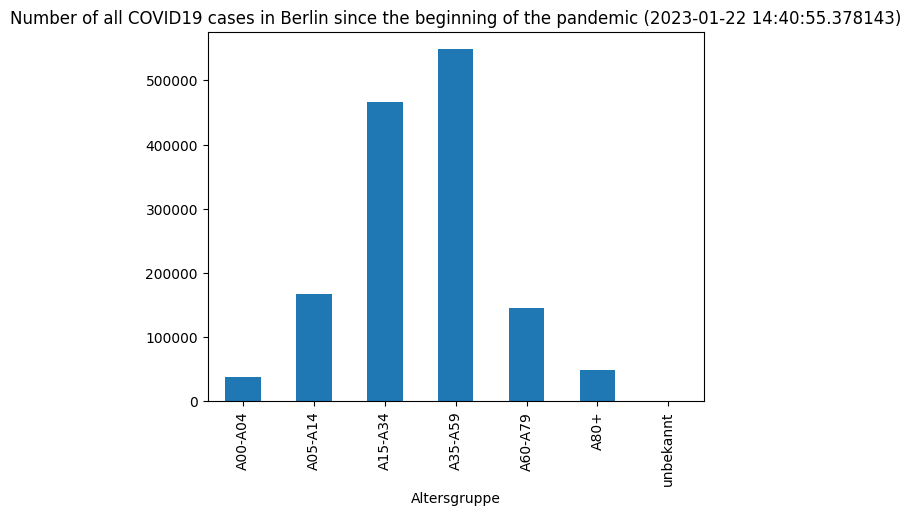

In [29]:
data_berlin.groupby('Altersgruppe').sum()['AnzahlFall'].plot(
    kind='bar',
    title=f'Number of all COVID19 cases in Berlin since the beginning of the pandemic ({data["Datenstand"].unique()[0]})'
);

Compare this plot with the [RKI Dashboard](https://corona.rki.de/).

#### _Your turn_: Exercises

__Exercise 11__: Since the `groupby` functionality is very powerful but also at first difficult to wraps our head around, go through the first two examples above again in your group and discuss questions.

__Exercise 12__: Get number of total COVID-19 cases by Berlin's districts and compare your findings to the [official COVID-19 table for Berlin > Bezirke > Übersicht](https://www.berlin.de/corona/lagebericht/).

__Exercise 13__: Plot the number of total COVID-19 cases in Berlin grouped by Berlin's districts (barplot).

## 6. Discussion

In this notebook, we saw how quickly possible it is to read in a csv file as `DataFrame` (*Chapter 5.2*) and to start working with it.
- We got a first impression on our COVID-19 Berlin dataset. We looked at the number of data points (`DataFrame` rows) and criteria (`DataFrame` columns) as well as some example data points, see *Chapter 5.3*.
- We selected interesting columns and checked what kind of column entries we can except, see *Chapter 5.4 and 5.5*.
- We grouped data by certain criteria (columns), and applied operations on these groups, e.g. we calculated the sum within each group). We also did some first steps towards plotting with `pandas`, see *Chapter 5.6*.

## 7. Final exercise

As promised at the beginning, you will get your own dataset now :)

Last year during the course, we could only work with COVID-19 cases data but luckily, this year, we have something positive to look at as well - the vaccination progress in Germany! You can find that data online again at the [RKI website](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquoten-Tab.html) (under the "Daten" section).

The provided Excel file is a bit difficult to handle, thus many GitHub repos have been set up to process the dataset into formats that are easier to work with, e.g. https://github.com/ard-data/2020-rki-impf-archive.

1. Let's load the cumulative vaccination progress for Germany.

In [30]:
vaccination_cumulative = pd.read_csv(
    "https://raw.githubusercontent.com/ard-data/2020-rki-impf-archive/master/data/9_csv_v3/region_DE.csv"
)
vaccination_cumulative.head()

,date,publication_date,dosen_kumulativ,personen_erst_kumulativ,personen_voll_kumulativ,personen_min1_kumulativ,personen_zweit_kumulativ,personen_auffr_kumulativ,dosen_biontech_kumulativ,personen_erst_biontech_kumulativ,...,impf_quote_voll_alter_60plus,impf_quote_min1_alter_60plus,impf_quote_zweit_alter_60plus,impf_quote_auffr_alter_60plus,impf_inzidenz_dosen_alter_60plus,impf_inzidenz_erst_alter_60plus,impf_inzidenz_voll_alter_60plus,impf_inzidenz_min1_alter_60plus,impf_inzidenz_zweit_alter_60plus,impf_inzidenz_auffr_alter_60plus
0,2020-12-27,2020-12-28 16:15,21566,21566.0,0,21566,0.0,NaN,21566,21566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-28,2020-12-29 08:00,41962,41962.0,0,41962,0.0,NaN,41962,41962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-30,2020-12-31 08:30,131626,131626.0,0,131626,0.0,NaN,131626,131626.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-31,2021-01-01 12:30,165575,165575.0,0,165575,0.0,NaN,165575,165575.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,2021-01-02 08:00,188553,188553.0,0,188553,0.0,NaN,188553,188553.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Let the `date` column know that it represents dates (change data structure from `object` to `datetime`). This will help us later during plotting because `pandas` will not try to label each day in the plot but maybe rather every month (depending on the range of dates).

In [31]:
vaccination_cumulative["date"] = pd.to_datetime(vaccination_cumulative["date"])
vaccination_cumulative.head()

,date,publication_date,dosen_kumulativ,personen_erst_kumulativ,personen_voll_kumulativ,personen_min1_kumulativ,personen_zweit_kumulativ,personen_auffr_kumulativ,dosen_biontech_kumulativ,personen_erst_biontech_kumulativ,...,impf_quote_voll_alter_60plus,impf_quote_min1_alter_60plus,impf_quote_zweit_alter_60plus,impf_quote_auffr_alter_60plus,impf_inzidenz_dosen_alter_60plus,impf_inzidenz_erst_alter_60plus,impf_inzidenz_voll_alter_60plus,impf_inzidenz_min1_alter_60plus,impf_inzidenz_zweit_alter_60plus,impf_inzidenz_auffr_alter_60plus
0,2020-12-27,2020-12-28 16:15,21566,21566.0,0,21566,0.0,NaN,21566,21566.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-28,2020-12-29 08:00,41962,41962.0,0,41962,0.0,NaN,41962,41962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-30,2020-12-31 08:30,131626,131626.0,0,131626,0.0,NaN,131626,131626.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-31,2021-01-01 12:30,165575,165575.0,0,165575,0.0,NaN,165575,165575.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,2021-01-02 08:00,188553,188553.0,0,188553,0.0,NaN,188553,188553.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
vaccination_cumulative.dtypes

date                                datetime64[ns]
publication_date                            object
dosen_kumulativ                              int64
personen_erst_kumulativ                    float64
personen_voll_kumulativ                      int64
                                         ...      
impf_inzidenz_erst_alter_60plus            float64
impf_inzidenz_voll_alter_60plus            float64
impf_inzidenz_min1_alter_60plus            float64
impf_inzidenz_zweit_alter_60plus           float64
impf_inzidenz_auffr_alter_60plus           float64
Length: 188, dtype: object

3. Set the date as the `DataFrame` index. Use `your_dataframe.set_index(column_name)` for that.

4. Select only the columns containing the cumulative number of people who are fully vaccinated or vaccinated once/twice (`personen_voll_kumulativ`, `personen_erst_kumulativ`, and `personen_zweit_kumulativ`).

5. Plot the cumulative time series.

6. Compare your results to the data on the BMG website: https://impfdashboard.de/

__Solutions__

__Words of encouragement :)__

Before you take a look at the solutions, try to solve the exercises yourself.

All the information needed lives in _5. Practical_ - if you are stuck, first take a look at the material there. Talk to your fellow students. If you have a solution, then go ahead and take a look here.

Also note that the solutions given here show only one possibility - most of the times there are multiple options to achieve the same end result.

<details>
<summary> > Solution 1</summary>
    
```python
data.head(4)
data.tail()
```
    
</details>

<details>
<summary> > Solution 2</summary>
    
```python
len(data.columns)
data.columns[2]
```
    
</details>

<details>
<summary> > Solution 3</summary>
    
```python
pd.DataFrame(
    [
        ["France", "Gewürztraminer", True],
        ["Australia", "beautiful nature", True],
        ["Israel", "hummus", True],
        ["Iceland", "language", False]
    ],
    columns=["country", "awesome because of", "been there"]
)
```
    
</details>

<details>
<summary> > Solution 4</summary>
    
```python
data[["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen"]]
```
    
</details>

<details>
<summary> > Solution 5</summary>
    
```python
data.loc[:, ["AnzahlFall", "AnzahlTodesfall", "AnzahlGenesen"]]
```
    
</details>

<details>
<summary> > Solution 6</summary>
    
```python
data.iloc[:, [4, 5, 6]]
```
    
</details>

<details>
<summary> > Solution 7</summary>
    
```python
data["Altersgruppe"].unique()
```
    
</details>

<details>
<summary> > Solution 8</summary>
    
```python
len(data["Landkreis"].unique())
```
    
</details>

<details>
<summary> > Solution 9</summary>
    
```python
data[data["Landkreis"] == "SK Berlin Mitte"]
```
    
</details>

<details>
<summary> > Solution 10</summary>
    
```python
data[
    (data["Bundesland"] == "Berlin") &
    (data["Altersgruppe"] == "A35-A59")
]
```
    
</details>

<details>
<summary> > Solution 11</summary>
    
Go through _Chapter 5.6._ one more time.
    
</details>

<details>
<summary> > Solution 12</summary>
    
```python
data_berlin.groupby('Landkreis')['AnzahlFall'].sum()
```
    
</details>

<details>
<summary> > Solution 13</summary>
    
```python
data_berlin.groupby('Landkreis')['AnzahlFall'].sum().plot(
    kind='bar', title=f'Number of COVID-19 cases in Berlin'
)
```
    
</details>

<details>
<summary> > Solution to final exercise</summary>
    
```python
vaccination_cumulative = vaccination_cumulative.set_index("date")
vaccination_cumulative = vaccination_cumulative[["personen_erst_kumulativ", "personen_voll_kumulativ", "personen_zweit_kumulativ"]]
vaccination_cumulative.plot()
```
    
</details>